<a href="https://colab.research.google.com/github/yashwanth-kokkanti/FinancialAppBehavior/blob/main/financialAppBehaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
''' 

In this Machine Learning end to end project, we are working on financial application data and predict the customer who will take a premium version app subscription or not. 
Then the company will take action on the customers to give the offers or not. The data contain the customer’s behavior and our job to find the insights from it.

''' 

### Business Problem

'''

The Financial Technology company (Fin-Tech Company) launch there a mobile app. This app used for financial purposes like bank loans, savings, etc. in one place. 
It has two versions free and premium. 
The free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.

The main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it. 
That’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior. 
After that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).

The job of the ML engineer is to find or predict new customer who is interested to buy the product or not. 
If the customers will buy a product anyway so no need to give an offer to that customer and loss the business. 
Only give offers to those customers who are interested to use premium version app but they can’t afford its cost. 
So the company will give offers to those customers and earn more money.

'''


'\n\nThe Financial Technology company (Fin-Tech Company) launch there a mobile app. This app used for financial purposes like bank loans, savings, etc. in one place. \nIt has two versions free and premium. \nThe free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.\n\nThe main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it. \nThat’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior. \nAfter that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).\n\nThe job of the ML engineer is to find or predict new customer who is interested to buy the product or not. \nIf the customers will buy a product anyway so no need to give an offer to that customer and loss the business. \nOnly give offers to those customers who are i

In [2]:
## Lets start 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
fineTech_appData = pd.read_csv("/content/FineTech_appData.csv")

In [4]:
fineTech_appData.shape

(50000, 12)

In [5]:
fineTech_appData.head(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0


In [6]:
## Screen list has Text Data 
## enrolled_data has Null Values
## Liked, enrolled, used_premium_feature and dayofweek is a categorical with 0 and 1 


fineTech_appData.tail(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49990,179308,2013-05-25 17:30:47.675,5,17:00:00,20,"Splash,idscreen,Cycle,Home,product_review,prod...",8,0,0,1,2013-05-26 06:33:54.237,1
49991,85532,2013-02-01 22:33:59.502,4,22:00:00,45,"Splash,Cycle,Home,Loan2,Loan1,MLWebView,Instit...",30,1,1,1,2013-02-01 22:35:36.750,0
49992,96155,2013-02-03 15:41:52.059,6,15:00:00,50,"idscreen,joinscreen,product_review,product_rev...",28,0,0,1,2013-02-03 15:43:43.163,0
49993,343026,2012-11-24 02:02:56.012,5,02:00:00,28,"joinscreen,product_review,product_review2,Scan...",4,0,0,0,NaN,1
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [7]:
## Looks like mostly First_Open and Enrolled Date are equal . 

## Let us check some data in Screen_list 

for i in range(5):
  print (fineTech_appData.loc[i, 'screen_list'], '\n')

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 



In [8]:
## This column says the screens customer navigated is what I understood. 



In [9]:
## Let us deep dive into Data.  Here is the brief description about columns 

''' 
1. user: Unique ID for each user.

2. first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.

3. dayofweek: On which day user logon.

0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday

4. Hour: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column.

5. age: The age of the registered user.

6. screen_list: The name of multiple screens seen by customers, which are separated by a comma.

7. numscreens: The total number of screens seen by customers.

8. minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.

9. used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.

10. enrolled: If the user bought a premium feature app then 1 otherwise 0.

11. enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.

12. liked: The each screen of the app has a like button if the customer likes it then 1 otherwise 0.

''' 



' \n1. user: Unique ID for each user.\n\n2. first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.\n\n3. dayofweek: On which day user logon.\n\n0: Sunday\n1: Monday\n2: Tuesday\n3: Wednesday\n4: Thursday\n5: Friday\n6: Saturday\n\n4. Hour: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column.\n\n5. age: The age of the registered user.\n\n6. screen_list: The name of multiple screens seen by customers, which are separated by a comma.\n\n7. numscreens: The total number of screens seen by customers.\n\n8. minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.\n\n9. used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.\n\n10. enrolled: If the user bought a premium feature app then 1 otherwise 0.\n\n11. enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features 

In [10]:
## Let us check null values in data set 

fineTech_appData.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [11]:
## Enrolled_date has lots of null values 18926

fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [12]:
''' 
All columns have 50,000 non-null values except enrolled_date. It has 31,074 non-null. 
There is a total of 8 columns that contain integer 64 bit (int64) values and the remaining 4 are object (text/date) type.

'''

fineTech_appData.describe()

'''
The mean age of the customer is 31.72. Only 10.7% of customers played minigame and 
17.2% customer used premium features of the app, likes 16.5 %. The 62.1% customer enrolled in the premium app.

'''

'\nThe mean age of the customer is 31.72. Only 10.7% of customers played minigame and \n17.2% customer used premium features of the app, likes 16.5 %. The 62.1% customer enrolled in the premium app.\n\n'

In [13]:
## Let us try to get the unique values of each features and its length 

features = fineTech_appData.columns

for i in features:
  print('Unique value of {} \n {} \n length is {} \n ...'.format(i, fineTech_appData[i].unique(), len(fineTech_appData[i].unique())))

Unique value of user 
 [235136 333588 254414 ... 302367 324905  27047] 
 length is 49874 
 ...
Unique value of first_open 
 ['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638'] 
 length is 49747 
 ...
Unique value of dayofweek 
 [3 6 1 4 2 0 5] 
 length is 7 
 ...
Unique value of hour 
 [' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00'] 
 length is 24 
 ...
Unique value of age 
 [ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  

In [14]:
''' From above it is clear that dayoftheweek is covering 7 days and hour is covering all 24 hours '''

## The ‘hour’ column contains object data type, so we converted into integer data type format.

fineTech_appData['hour'] = fineTech_appData.hour.str.slice(1, 3).astype(int) ## slice 1-3 because it has one space at the starting

fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [15]:
## To visualize the data need numeric values for that we drop some columns that datatype is the object.

fineTech_appData2 = fineTech_appData.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

fineTech_appData2.head(6)


,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


Text(0.5, 1.0, 'HeatMap Using Correlation Matrix of the FineTech_AppData ')

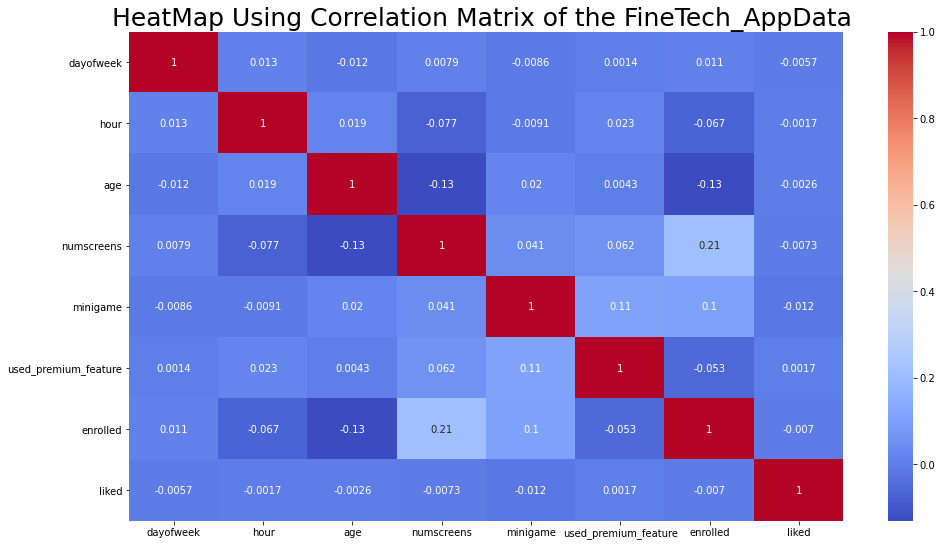

In [16]:
### Data Visualization 

# Plot HeatMap using Correlation matrix 

plt.figure(figsize=(16,9))
sns.heatmap(fineTech_appData2.corr(), cmap='coolwarm', annot=True)
plt.title('HeatMap Using Correlation Matrix of the FineTech_AppData ', fontsize=25)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


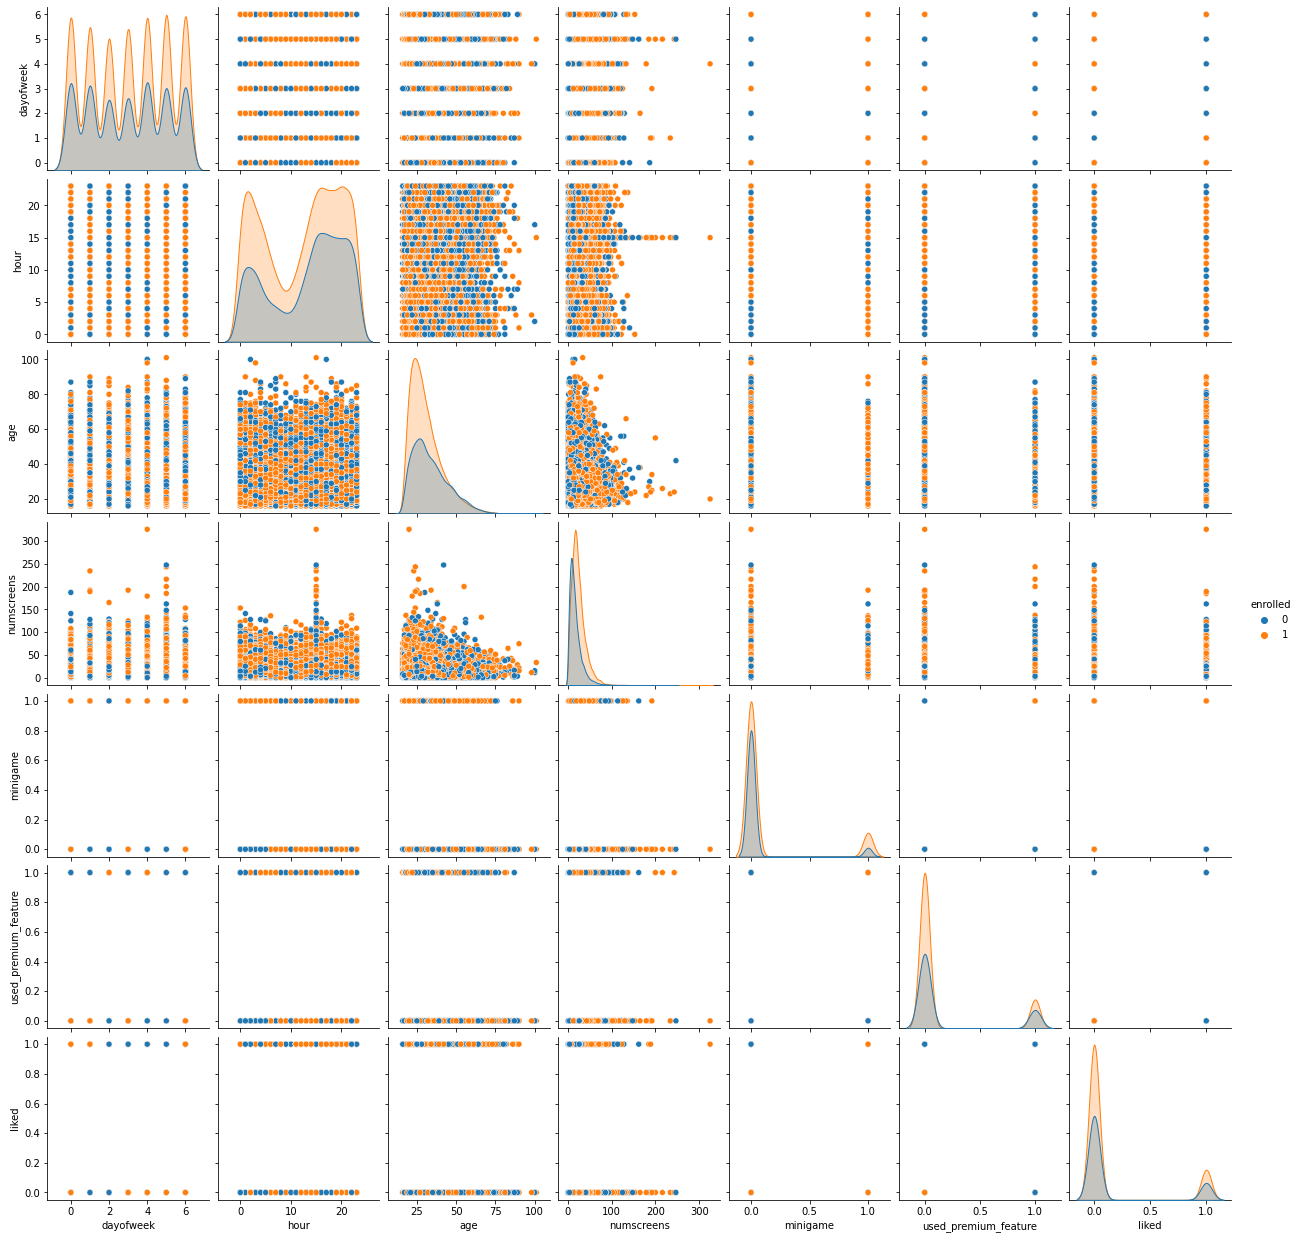

In [17]:
## Age and Numscreens are negatively related ==> aged people are not navigating more screens it seems.
## enrolled and numscreens are little positively correlated ==> If navigated mor screens then there is chance of enorolling



## Let us check for pairplot 

%time
sns.pairplot(fineTech_appData2, hue='enrolled')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


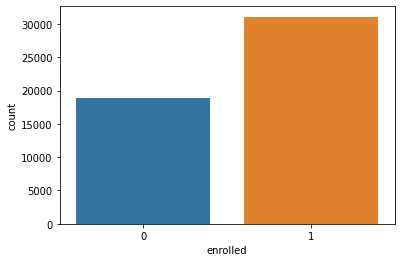

In [18]:
## Count of Enrolled 
%time
sns.countplot(fineTech_appData.enrolled)



In [19]:
## Let us check for class distribution of enrolled and not-enrolled in exact numbers

# value enrolled and not enrolled customers

print("Not enrolled user = ", (fineTech_appData.enrolled < 1).sum(), "out of 50000") ## < 1 is due to one row goes for column names
print("Enrolled user = ",50000-(fineTech_appData.enrolled < 1).sum(),  "out of 50000")

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs


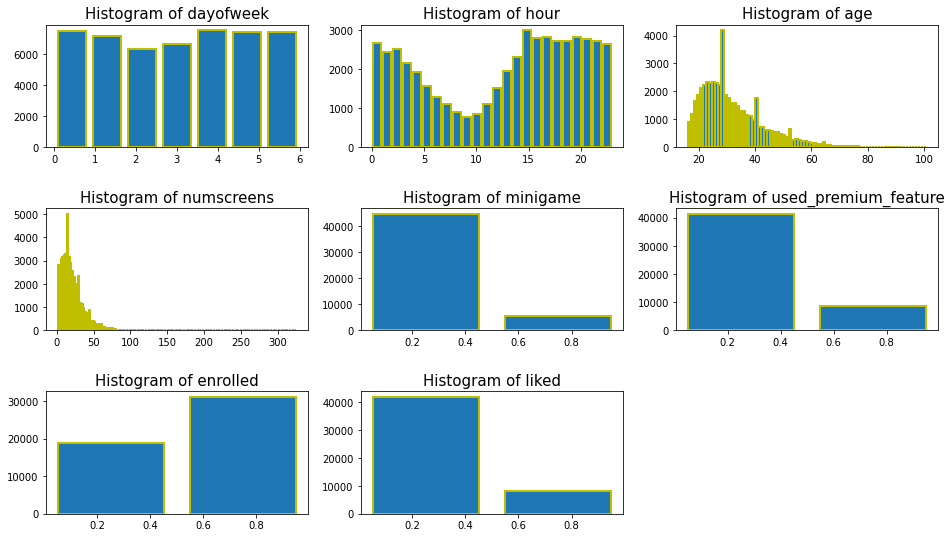

In [20]:
## Clearly this is imbalanced data set 

## Let us plot Histogrom of each column indivitually 

%time 

plt.figure(figsize=(16, 9))

features = fineTech_appData2.columns

for i,j in enumerate(features):
  plt.subplot(3, 3, i+1)
  plt.title('Histogram of {}'.format(j), fontsize=15)

  bins = len(fineTech_appData2[j].unique())
  plt.hist(fineTech_appData2[j], bins=bins, rwidth=0.8, edgecolor="y", linewidth=2)

plt.subplots_adjust(hspace=0.5)

In [21]:
## Observations 

''' 
1. The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app.
2. The histogram of ‘hour’ shows the less customer register on the app around 10 (+/- 3 hours around 10 )AM.
3. The ‘age’ histogram shows, the maximum customers are younger.(of age 25-28)
4. The ‘numsreens’ histogram shows the few customers saw more than 40 screens.

'''


' \n1. The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app.\n2. The histogram of ‘hour’ shows the less customer register on the app around 10 (+/- 3 hours around 10 )AM.\n3. The ‘age’ histogram shows, the maximum customers are younger.(of age 25-28)\n4. The ‘numsreens’ histogram shows the few customers saw more than 40 screens.\n\n'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


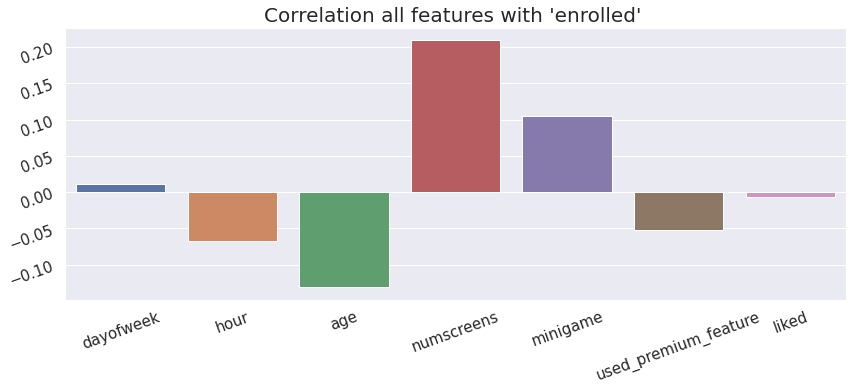

In [22]:
## Correlation Bar PLot with Enrolled Feature 

sns.set() 

plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)

fineTech_appData3 = fineTech_appData2.drop(['enrolled'], axis = 1) 

ax =sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(fineTech_appData2.enrolled))
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") 

In [23]:
## This shows FEw columns are negatively corelated with Enrolled like age, hour  and others are positively correlated


In [24]:
## Now Let us Parse datetiem columns (first_open and enrolled_date ) from object to datetime format 

from dateutil import parser

fineTech_appData['first_open'] = [parser.parse(i) for i in fineTech_appData['first_open']]

fineTech_appData['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]
 
fineTech_appData.dtypes


user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <a list of 10 Patch objects>)

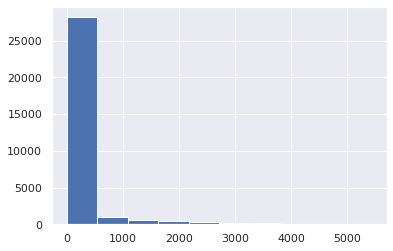

In [25]:
## We can create a new column on how much time taken by customer to get enrolled in the premium feature 
## for that enrolled_date - first_open will work 

fineTech_appData['time_to_enrolled'] = (fineTech_appData.enrolled_date - fineTech_appData.first_open).astype('timedelta64[h]')


# Let us plot the Histogram of new column . Time_to_enrolled 

plt.hist(fineTech_appData['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

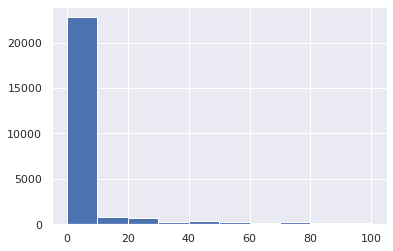

In [26]:
## Lets try to show the distribution in between 0 to 100 hours 

plt.hist(fineTech_appData['time_to_enrolled'].dropna(), range = (0,100))

In [27]:
## So mostly its less than 10 hours . and there are few numbers with more than 20 hours which look like outliers 
## Because no one can spend more than 


## Let us consider those customers have enrolled after 48 hours as 0

fineTech_appData.loc[fineTech_appData.time_to_enrolled > 48, 'enrolled'] = 0



In [28]:
## Few columns like ‘time_to_enrolled’, ‘enrolled_date’, ‘first_open’  are not strongly correlated to the result. So let us Drop them


fineTech_appData.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [29]:
## Let us read another csv file that contains top screens data 

fineTech_app_screen_Data = pd.read_csv("/content/top_screens.csv").top_screens.values
 
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [30]:
## Add ‘,’ at the end of each string of ‘screen_list’ to create new columns with each screen 

fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str) + ','


In [31]:
## Creating new feature as below 

'''
The ‘Screen_list’ contains string values but we can’t use it directly. 
So to solve this problem we are taking each screen name from ‘fineTech_app_screen_Data’ and append as a column 
by the same name to ‘fineTech_appData’. 

Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.
'''


for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)  ## PLace 1 if screen name contains else 0
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+",", "") ## Remove Screen_Name in the row data

fineTech_appData.head(5)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
fineTech_appData.shape

(50000, 68)

In [33]:
## Those screens are not availble in ‘fineTech_app_screen_Data’ 
## that are counted and counted number store in new column by name ‘remain_screen_list’.

fineTech_appData.loc[3,'screen_list']

'product_review,Home,product_review,ReferralContainer,ScanPreview,VerifySSN,'

In [34]:
fineTech_appData.loc[0, 'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [35]:
## count remain screen list and store counted number in 'remain_screen_list'

fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")


In [36]:
fineTech_appData.head(5)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [37]:
## Dropping Screen List 


fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [38]:
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [39]:
  ## All the Saving Screens are similar to each other, so let us take the sum of all saving screens in each row and store in a single row


  saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',]

fineTech_appData['saving_screens_count'] = fineTech_appData[saving_screens].sum(axis=1)
fineTech_appData.drop(columns = saving_screens, inplace = True)

fineTech_appData.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count
0,235136,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0


In [40]:
## Similarly for Credit and Loan Screens 


credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count'] = fineTech_appData[credit_screens].sum(axis = 1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

fineTech_appData.shape

(50000, 55)

In [41]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, inplace = True)

In [42]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis = 1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [43]:
fineTech_appData.shape

(50000, 50)

In [44]:
## Data PReprocessing : Split train and test data

clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled']
fineTech_appData.drop(columns = 'enrolled', inplace = True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData, target, test_size = 0.2, random_state = 0)

In [45]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)

print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [46]:
## Taking out User ID . This is just a number. 

train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True
             )
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)

print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


In [48]:
## Feature Scaling Uinsg Standard Scaler 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

X_train_sc[:5]

array([[-0.50496081,  1.00083719,  0.02552487, -1.02672599, -0.34683033,
         2.18601845,  2.24631904, -1.03921848, -0.64484802, -1.05258054,
        -0.68761056, -0.95118973, -0.43460779, -0.85862805, -0.75852577,
        -0.71878034, -0.50374724, -0.30336596, -0.22674689, -0.28801788,
        -0.2821223 , -0.23414633, -0.23862689, -0.21795486, -0.17819139,
        -0.2084056 , -0.22417557,  0.        , -0.21858341, -0.20709612,
        -0.15630969, -0.16297945, -0.15538404, -0.18196487, -0.15188889,
        -0.17608961, -0.14805468,  3.03596997, -0.11969701, -0.11742023,
        -0.1158789 , -0.09120652, -0.08722062, -1.14730266, -0.26087748,
        -0.7633719 , -0.28918541,  1.78538924],
       [-0.99738931,  1.13528016, -0.89803445,  1.32882912,  2.88325421,
        -0.45745268, -0.44517274,  0.96226157,  1.550753  ,  0.95004606,
         1.45431159,  1.05131497, -0.43460779,  1.16464865,  1.31834677,
         1.39124562,  1.98512253,  3.29634876, -0.22674689, -0.28801788,
   

In [49]:
## Now the data is scaled  and converted to numpy array 

## Let us start building ML Models 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



In [50]:
## Decission Tree Classifier 

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt) ## not Worse . also Not good .

0.6936

In [51]:
dt_model_gini = DecisionTreeClassifier(criterion= 'gini', random_state=0)
dt_model_gini.fit(X_train, y_train)

y_pred_dt = dt_model_gini.predict(X_test)
accuracy_score(y_test, y_pred_dt) 

## LIttle better than Entropy model but both are same in number. 

0.6963

In [52]:
## With Standard Data 

dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)

y_pred_dt_sc = dt_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

## Decision Tree Accuracy is same for both standard and non  standard data . 

0.6932

In [53]:
## KNN 

%time 

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,) ## Minkowski with p=2 represents Euclidean 
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
 
accuracy_score(y_test, y_pred_knn)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


0.6994

In [54]:
## Just wanted to check time on manhattan 

%time

knn_model_1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1,) ## Minkowski with p=1 represents manhattan 
knn_model_1.fit(X_train, y_train)

y_pred_knn = knn_model_1.predict(X_test)
 
accuracy_score(y_test, y_pred_knn)

%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [55]:
## With Standard Data 

%time 
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)

y_pred_knn_sc = knn_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_knn_sc)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs


0.7314

In [56]:
## KNN is worst model in terms of execution as it takes more time in training if it has more data and features . So please avoid it mostly 


In [57]:
## Naive Bayes Classifier 

%time 

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() ## For Numerical Data 

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


0.7114

In [58]:
# train with Standert Scaling dataset

%time 

nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)

y_pred_nb_sc = nb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_nb_sc)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


0.7114

In [59]:
# Random Forest Classifier

%time 

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs


0.7827

In [60]:
# train with Standert Scaling dataset

%time 

rf_model2 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)

y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


0.7832

In [61]:
## Logistic Regression 

%time
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7686

In [62]:
# train with Standert Scaling dataset

%time 

lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_sc, y_train)

y_pred_lr_sc = lr_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


0.768

In [63]:
# Support Vector Machine

%time 

from sklearn.svm import SVC
svc_model = SVC()

svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


0.7609

In [64]:
## Support Vectors also take much time in identifying support vectors. 

# train with Standert Scaling dataset

%time 

svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)

y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


0.7789

In [65]:
# XGBoost Classifier

%time 
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


0.7748

In [66]:
# train with Standert Scaling dataset

%time 
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)

y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs


0.7748

In [67]:


# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)
 
accuracy_score(y_test, y_pred_xgb_pt1)



0.7887

In [68]:
# XGB classifier with parameter tuning

# train with Stander Scaling dataset

xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)

0.7887

Text(0.5, 1.0, 'Confussion Matrix')

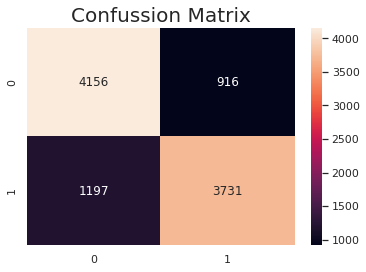

In [69]:
## SVM, XGBoost and RandomForest (100 estimators ) gave accuracy around 77%. 
## SVM took too much time on training data 

## Let us plot confusion matrix on xgboost model 

cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 



In [70]:
## The model is giving type II error higher than type I. 

## Classification Report 

cr_xgb_pt2 = classification_report (y_test, y_pred_xgb_sc_pt2)

print (cr_xgb_pt2)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [71]:
## Cross Validation of ML Model 

from sklearn.model_selection import cross_val_score 

cross_validation = cross_val_score (estimator=xgb_model_pt2, X=X_train_sc, y=y_train, cv=10, verbose=1)

print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross validation of XGBoost model =  [0.79125 0.77975 0.791   0.786   0.78025 0.786   0.79225 0.78225 0.79025
 0.7785 ]
Cross validation of XGBoost model (in mean) =  0.7857500000000001


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 29.5min finished


In [72]:
## Mapping Predicted ouput to target for 

# final_result = pd.concat([test_userID, y_test], axis=1)
# final_result['predicted_result'] = y_pred_xgb_sc_pt2

# print (final_result)

In [74]:
## Saving Model 

import pickle 

## Dump Model 

pickle.dump(xgb_model_pt2, open('/content/FineTech_App_Model_XGB.pkl', 'wb'))

## Load Model 
mdl = pickle.load(open('/content/FineTech_App_Model_XGB.pkl', 'rb'))

# predict the output
y_pred_pl = mdl.predict(X_test_sc)


# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confussion matrix = \n', cm_pl)

# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))


Confussion matrix = 
 [[4156  916]
 [1197 3731]]
Accuracy of model =  0.7887


In [76]:
## Save Model Using Joblib 

from sklearn.externals import joblib 

## Dump Model 
joblib.dump(xgb_model_pt2, '/content/FineTech_app_ML_model_xgb.joblib')


## Load Model 
ml_model_jl = joblib.load('/content/FineTech_app_ML_model_xgb.joblib')


# predict the output 
y_pred_jl = ml_model_jl.predict(X_test_sc)
 
cm_jl = confusion_matrix(y_test, y_pred_jl)
print('Confussion matrix = \n', cm_jl)
 
print("Accuracy of model = ", accuracy_score(y_test, y_pred_jl))

Confussion matrix = 
 [[4156  916]
 [1197 3731]]
Accuracy of model =  0.7887


In [77]:
### Final Conclusion 

'''

To get more accuracy, we train all supervised classification algorithms
After training all algorithms, SVC and XGBoost classifiers are given high accuracy than remain


'''




'\n\nTo get more accuracy, we train all supervised classification algorithms\nAfter training all algorithms, SVC and XGBoost classifiers are given high accuracy than remain\n\n\n'